# Property Listed Price and Rent Prediction

In [137]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [138]:
data = pd.read_csv('./data/data.csv')
data

,State,City,Street,Zipcode,Bedroom,Bathroom,Area,PPSq,LotArea,MarketEstimate,RentEstimate,Latitude,Longitude,ListedPrice
0,AL,Saraland,Scott Dr,36571.0,4.0,2.0,1614.0,148.636927,0.3805,240600.0,1599.0,30.819534,-88.095960,239900.0
1,AL,Robertsdale,Cowpen Creek Rd,36567.0,3.0,2.0,1800.0,144.388889,3.2000,NaN,NaN,30.590004,-87.580376,259900.0
2,AL,Gulf Shores,Spinnaker Dr #201,36542.0,2.0,2.0,1250.0,274.000000,NaN,NaN,NaN,30.284956,-87.747920,342500.0
3,AL,Chelsea,Mallet Way,35043.0,3.0,3.0,2224.0,150.629496,0.2600,336200.0,1932.0,33.357986,-86.608700,335000.0
4,AL,Huntsville,Turtlebrook Ct,35811.0,3.0,2.0,1225.0,204.081633,NaN,222700.0,1679.0,34.775517,-86.440700,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22676,WY,Burns,Road 210a,82053.0,2.0,1.0,1112.0,337.230216,20.0000,368600.0,1500.0,41.149517,-104.439620,375000.0
22677,WY,Cody,Lincoln Ave,82414.0,2.0,3.0,1232.0,241.801948,0.0300,NaN,NaN,44.524570,-109.033844,297900.0
22678,WY,Dubois,Mason Dr,82513.0,2.0,2.0,2016.0,262.896825,1.4200,NaN,2294.0,43.521640,-109.594050,530000.0
22679,WY,Cheyenne,Carolina Rd,82009.0,3.0,2.0,2930.0,196.552901,6.2300,558000.0,2749.0,41.138450,-105.052790,575900.0


In [139]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22681 entries, 0 to 22680
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   State           22681 non-null  object 
 1   City            22681 non-null  object 
 2   Street          22681 non-null  object 
 3   Zipcode         22681 non-null  float64
 4   Bedroom         22667 non-null  float64
 5   Bathroom        22647 non-null  float64
 6   Area            22681 non-null  float64
 7   PPSq            22681 non-null  float64
 8   LotArea         21779 non-null  float64
 9   MarketEstimate  15445 non-null  float64
 10  RentEstimate    16705 non-null  float64
 11  Latitude        22681 non-null  float64
 12  Longitude       22681 non-null  float64
 13  ListedPrice     22681 non-null  float64
dtypes: float64(11), object(3)
memory usage: 2.4+ MB


In [140]:
data.describe()

,Zipcode,Bedroom,Bathroom,Area,PPSq,LotArea,MarketEstimate,RentEstimate,Latitude,Longitude,ListedPrice
count,22681.000000,22667.000000,22647.000000,22681.000000,22681.000000,21779.000000,1.544500e+04,16705.000000,22681.000000,22681.000000,2.268100e+04
mean,50023.455403,3.393435,2.423299,2128.138398,222.641994,2.354870,4.870383e+05,2624.699192,39.751686,-92.299353,5.324399e+05
std,29570.312497,1.050506,1.157670,1577.512556,202.811788,16.128371,1.155986e+06,4029.614920,5.694751,16.866820,1.574922e+06
min,1002.000000,0.000000,0.000000,120.000000,1.925926,0.000000,1.570000e+04,100.000000,25.449816,-161.772780,4.888000e+03
25%,25419.000000,3.000000,2.000000,1400.000000,132.729544,0.173439,2.306000e+05,1641.000000,35.938618,-103.317760,2.250000e+05
50%,50703.000000,3.000000,2.000000,1849.000000,184.122149,0.299449,3.417000e+05,2149.000000,39.938480,-89.185210,3.449000e+05
75%,74134.000000,4.000000,3.000000,2466.000000,257.118205,0.930000,4.995000e+05,2800.000000,42.936455,-79.108376,4.999000e+05
max,99950.000000,21.000000,25.000000,99990.000000,6117.071334,800.000000,7.195920e+07,212834.000000,65.044370,-67.016030,7.600000e+07


In [141]:
data.sort_values('Zipcode')

,State,City,Street,Zipcode,Bedroom,Bathroom,Area,PPSq,LotArea,MarketEstimate,RentEstimate,Latitude,Longitude,ListedPrice
9571,MA,Amherst,Sunderland Rd,1002.0,4.0,3.0,3120.0,181.089744,2.700000,526800.0,3499.0,42.422096,-72.538150,565000.0
9109,MA,Belchertown,Mill Valley Rd,1007.0,3.0,2.0,1512.0,210.978836,1.760000,324600.0,2274.0,42.263100,-72.374750,319000.0
9237,MA,Belchertown,Gold St,1007.0,3.0,2.0,1296.0,270.061728,1.730000,355000.0,2949.0,42.342020,-72.410630,350000.0
9117,MA,Chester,Maple St,1011.0,5.0,2.0,2136.0,46.816479,0.450000,88900.0,2800.0,42.278910,-72.979530,100000.0
9225,MA,Chicopee,Fairmont St,1013.0,2.0,1.0,1008.0,237.996032,0.511387,242000.0,1800.0,42.185658,-72.598274,239900.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
765,AK,Ketchikan,Mayo Ln,99901.0,3.0,2.0,1344.0,408.482143,0.650000,531600.0,2334.0,55.303368,-131.534480,549000.0
715,AK,Coffman Cove,NE Minke,99918.0,1.0,1.0,1200.0,290.833333,3.900000,346900.0,1900.0,56.012170,-132.810640,349000.0
546,AK,Coffman Cove,Coho Dr,99918.0,3.0,3.0,1850.0,539.459459,0.400000,NaN,2585.0,56.021515,-132.827740,998000.0
781,AK,Wrangell,.2 Mile Zimovia Hwy,99929.0,3.0,2.0,1800.0,206.666667,0.980000,370600.0,2500.0,56.363064,-132.356580,372000.0


In [142]:
data.isna().sum()

State                0
City                 0
Street               0
Zipcode              0
Bedroom             14
Bathroom            34
Area                 0
PPSq                 0
LotArea            902
MarketEstimate    7236
RentEstimate      5976
Latitude             0
Longitude            0
ListedPrice          0
dtype: int64

In [143]:
data.duplicated().sum()

0

In [144]:
data.eq(0).sum()

State               0
City                0
Street              0
Zipcode             0
Bedroom            32
Bathroom           76
Area                0
PPSq                0
LotArea           220
MarketEstimate      0
RentEstimate        0
Latitude            0
Longitude           0
ListedPrice         0
dtype: int64

In [184]:
df = data.copy()

In [185]:
# Convert Zipcode to string
df['Zipcode'] = df['Zipcode'].astype(int).astype(str)
df['Zipcode'] = df['Zipcode'].apply(lambda x: x.zfill(5) if len(x) == 4 else x)

In [186]:
df.head()

,State,City,Street,Zipcode,Bedroom,Bathroom,Area,PPSq,LotArea,MarketEstimate,RentEstimate,Latitude,Longitude,ListedPrice
0,AL,Saraland,Scott Dr,36571,4.0,2.0,1614.0,148.636927,0.3805,240600.0,1599.0,30.819534,-88.095960,239900.0
1,AL,Robertsdale,Cowpen Creek Rd,36567,3.0,2.0,1800.0,144.388889,3.2000,NaN,NaN,30.590004,-87.580376,259900.0
2,AL,Gulf Shores,Spinnaker Dr #201,36542,2.0,2.0,1250.0,274.000000,NaN,NaN,NaN,30.284956,-87.747920,342500.0
3,AL,Chelsea,Mallet Way,35043,3.0,3.0,2224.0,150.629496,0.2600,336200.0,1932.0,33.357986,-86.608700,335000.0
4,AL,Huntsville,Turtlebrook Ct,35811,3.0,2.0,1225.0,204.081633,NaN,222700.0,1679.0,34.775517,-86.440700,250000.0


In [187]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22681 entries, 0 to 22680
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   State           22681 non-null  object 
 1   City            22681 non-null  object 
 2   Street          22681 non-null  object 
 3   Zipcode         22681 non-null  object 
 4   Bedroom         22667 non-null  float64
 5   Bathroom        22647 non-null  float64
 6   Area            22681 non-null  float64
 7   PPSq            22681 non-null  float64
 8   LotArea         21779 non-null  float64
 9   MarketEstimate  15445 non-null  float64
 10  RentEstimate    16705 non-null  float64
 11  Latitude        22681 non-null  float64
 12  Longitude       22681 non-null  float64
 13  ListedPrice     22681 non-null  float64
dtypes: float64(10), object(4)
memory usage: 2.4+ MB


In [188]:
df[df['LotArea'].isna()]

,State,City,Street,Zipcode,Bedroom,Bathroom,Area,PPSq,LotArea,MarketEstimate,RentEstimate,Latitude,Longitude,ListedPrice
2,AL,Gulf Shores,Spinnaker Dr #201,36542,2.0,2.0,1250.0,274.000000,NaN,NaN,NaN,30.284956,-87.747920,342500.0
4,AL,Huntsville,Turtlebrook Ct,35811,3.0,2.0,1225.0,204.081633,NaN,222700.0,1679.0,34.775517,-86.440700,250000.0
10,AL,Huntsville,Chancel Dr SE #5046,35802,2.0,3.0,2099.0,94.807051,NaN,NaN,NaN,34.691204,-86.565834,199000.0
43,AL,Tuscaloosa,22nd Ave E,35405,3.0,2.0,1444.0,110.734072,NaN,192300.0,1500.0,33.154710,-87.509790,159900.0
83,AL,Northport,Dunston Cir,35475,4.0,2.0,2349.0,140.442742,NaN,328500.0,1999.0,33.303703,-87.594124,329900.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22181,WI,Fredonia,Pine Ridge COURT UNIT G,53021,2.0,2.0,1360.0,191.102941,NaN,235300.0,1599.0,43.304950,-87.968025,259900.0
22210,WI,Menomonee Falls,N8925 Water STREET UNIT 401,53051,2.0,2.0,1358.0,165.611193,NaN,NaN,NaN,43.179752,-88.113815,224900.0
22300,WY,Pinedale,Sylvan Ln,82941,0.0,0.0,320.0,467.187500,NaN,NaN,394.0,42.951412,-109.777370,149500.0
22366,WY,Cody,Winchester Dr,82414,3.0,2.0,2095.0,374.701671,NaN,NaN,NaN,44.468525,-109.466120,785000.0


In [189]:
df.sort_values('Zipcode')

,State,City,Street,Zipcode,Bedroom,Bathroom,Area,PPSq,LotArea,MarketEstimate,RentEstimate,Latitude,Longitude,ListedPrice
9571,MA,Amherst,Sunderland Rd,01002,4.0,3.0,3120.0,181.089744,2.700000,526800.0,3499.0,42.422096,-72.538150,565000.0
9109,MA,Belchertown,Mill Valley Rd,01007,3.0,2.0,1512.0,210.978836,1.760000,324600.0,2274.0,42.263100,-72.374750,319000.0
9237,MA,Belchertown,Gold St,01007,3.0,2.0,1296.0,270.061728,1.730000,355000.0,2949.0,42.342020,-72.410630,350000.0
9117,MA,Chester,Maple St,01011,5.0,2.0,2136.0,46.816479,0.450000,88900.0,2800.0,42.278910,-72.979530,100000.0
9225,MA,Chicopee,Fairmont St,01013,2.0,1.0,1008.0,237.996032,0.511387,242000.0,1800.0,42.185658,-72.598274,239900.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
765,AK,Ketchikan,Mayo Ln,99901,3.0,2.0,1344.0,408.482143,0.650000,531600.0,2334.0,55.303368,-131.534480,549000.0
715,AK,Coffman Cove,NE Minke,99918,1.0,1.0,1200.0,290.833333,3.900000,346900.0,1900.0,56.012170,-132.810640,349000.0
546,AK,Coffman Cove,Coho Dr,99918,3.0,3.0,1850.0,539.459459,0.400000,NaN,2585.0,56.021515,-132.827740,998000.0
781,AK,Wrangell,.2 Mile Zimovia Hwy,99929,3.0,2.0,1800.0,206.666667,0.980000,370600.0,2500.0,56.363064,-132.356580,372000.0


In [190]:
df = df.dropna(subset=['Bedroom', 'Bathroom', 'LotArea'])
df.isna().sum()

State                0
City                 0
Street               0
Zipcode              0
Bedroom              0
Bathroom             0
Area                 0
PPSq                 0
LotArea              0
MarketEstimate    6850
RentEstimate      5675
Latitude             0
Longitude            0
ListedPrice          0
dtype: int64

In [191]:
df.shape

(21745, 14)

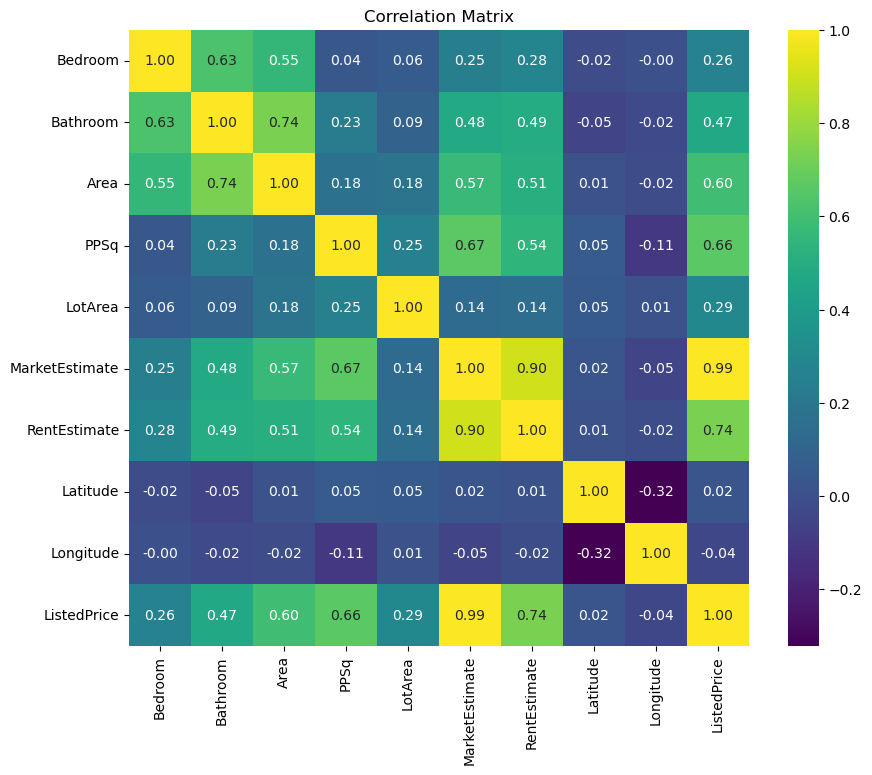

In [192]:
corr_cols = df.select_dtypes(include=['float64'])

# Calculate the correlation matrix
correlation_matrix = corr_cols.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [193]:
# Imputating RentEstimate and MarketEstimate values
imp_df = df.dropna(subset=['RentEstimate', 'MarketEstimate']) 

correlation_est = imp_df['MarketEstimate'].corr(imp_df['ListedPrice'])
correlation_rent = imp_df['RentEstimate'].corr(imp_df['MarketEstimate'])
print(f'Correlation between MarketEstimate and ListedPrice: {correlation_est:.2f}')
print(f'Correlation between RentEstimate and MarketEstimate: {correlation_rent:.2f}')

Correlation between MarketEstimate and ListedPrice: 0.99
Correlation between RentEstimate and MarketEstimate: 0.90


In [194]:
from sklearn.linear_model import LinearRegression

model_est = LinearRegression()
model_rent = LinearRegression()

model_est.fit(imp_df['ListedPrice'].values.reshape(-1, 1),imp_df['MarketEstimate'].values)
model_rent.fit(imp_df['MarketEstimate'].values.reshape(-1, 1),imp_df['RentEstimate'].values)

est_missing_data = df[df['MarketEstimate'].isna()]
est_predicted_values = model_est.predict(est_missing_data['ListedPrice'].values.reshape(-1, 1))
df.loc[df['MarketEstimate'].isna(), 'MarketEstimate'] = est_predicted_values

rent_missing_data = df[df['RentEstimate'].isna()]
rent_predicted_values = model_rent.predict(rent_missing_data['MarketEstimate'].values.reshape(-1, 1))
df.loc[df['RentEstimate'].isna(), 'RentEstimate'] = rent_predicted_values

In [195]:
df.isna().sum()

State             0
City              0
Street            0
Zipcode           0
Bedroom           0
Bathroom          0
Area              0
PPSq              0
LotArea           0
MarketEstimate    0
RentEstimate      0
Latitude          0
Longitude         0
ListedPrice       0
dtype: int64

In [157]:
data[data['RentEstimate'].isna()]

,State,City,Street,Zipcode,Bedroom,Bathroom,Area,PPSq,LotArea,MarketEstimate,RentEstimate,Latitude,Longitude,ListedPrice
1,AL,Robertsdale,Cowpen Creek Rd,36567.0,3.0,2.0,1800.0,144.388889,3.20,NaN,NaN,30.590004,-87.580376,259900.0
2,AL,Gulf Shores,Spinnaker Dr #201,36542.0,2.0,2.0,1250.0,274.000000,NaN,NaN,NaN,30.284956,-87.747920,342500.0
9,AL,Madison,Highpointb Plan Grayson Lndg,35756.0,4.0,3.0,3030.0,173.234323,0.34,NaN,NaN,34.755985,-86.865920,524900.0
10,AL,Huntsville,Chancel Dr SE #5046,35802.0,2.0,3.0,2099.0,94.807051,NaN,NaN,NaN,34.691204,-86.565834,199000.0
12,AL,Fort Mitchell,Old Glory Way,36856.0,4.0,2.0,2094.0,136.103152,0.34,NaN,NaN,32.272870,-84.980064,285000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22648,WY,Cody,Cowgill Rd,82414.0,4.0,2.0,1861.0,260.612574,0.25,NaN,NaN,44.530445,-109.040780,485000.0
22661,WY,Greybull,5th Ave N,82426.0,3.0,2.0,2398.0,93.828190,0.16,NaN,NaN,44.493767,-108.054375,225000.0
22665,WY,Lander,Hillcrest Dr,82520.0,5.0,3.0,2700.0,229.259259,1.00,NaN,NaN,42.812485,-108.738860,619000.0
22672,WY,Jackson,S Glenwood St #304,83001.0,3.0,3.0,1729.0,2128.397918,0.00,NaN,NaN,43.477757,-110.764040,3680000.0


In [196]:
df

,State,City,Street,Zipcode,Bedroom,Bathroom,Area,PPSq,LotArea,MarketEstimate,RentEstimate,Latitude,Longitude,ListedPrice
0,AL,Saraland,Scott Dr,36571,4.0,2.0,1614.0,148.636927,0.3805,240600.000000,1599.000000,30.819534,-88.095960,239900.0
1,AL,Robertsdale,Cowpen Creek Rd,36567,3.0,2.0,1800.0,144.388889,3.2000,269447.471663,1941.762320,30.590004,-87.580376,259900.0
3,AL,Chelsea,Mallet Way,35043,3.0,3.0,2224.0,150.629496,0.2600,336200.000000,1932.000000,33.357986,-86.608700,335000.0
5,AL,Montgomery,Brampton Ln,36117,3.0,2.0,1564.0,96.547315,0.2000,150500.000000,1385.000000,32.372746,-86.165115,151000.0
6,AL,Boaz,Greenwood Ave,35957,3.0,2.0,1717.0,139.196273,0.3800,238400.000000,2125.000000,34.210014,-86.136690,239000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22676,WY,Burns,Road 210a,82053,2.0,1.0,1112.0,337.230216,20.0000,368600.000000,1500.000000,41.149517,-104.439620,375000.0
22677,WY,Cody,Lincoln Ave,82414,2.0,3.0,1232.0,241.801948,0.0300,304107.897716,2055.555235,44.524570,-109.033844,297900.0
22678,WY,Dubois,Mason Dr,82513,2.0,2.0,2016.0,262.896825,1.4200,515810.131583,2294.000000,43.521640,-109.594050,530000.0
22679,WY,Cheyenne,Carolina Rd,82009,3.0,2.0,2930.0,196.552901,6.2300,558000.000000,2749.000000,41.138450,-105.052790,575900.0
